In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df.groupby('Sex').agg({'Age':'median'})

,Age
Sex,
female,27.0
male,29.0


In [4]:
df[df['Sex']=='male']['Age'].fillna(value = 29.0).head(20)

0     22.0
4     35.0
5     29.0
6     54.0
7      2.0
12    20.0
13    39.0
16     2.0
17    29.0
20    35.0
21    34.0
23    28.0
26    29.0
27    19.0
29    29.0
30    40.0
33    66.0
34    28.0
35    42.0
36    29.0
Name: Age, dtype: float64

In [5]:
df.fillna(df.groupby('Sex').transform('median'), inplace = True)


In [6]:
df.fillna(value = 'U', inplace = True)

In [141]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,U,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
Sex1 = {'Sex': {'male': 0, 'female':1},
       'Embarked':{'U':0,'S':1,'C':2,'Q':3}}

df1 = df.replace(Sex1)
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,1
5,6,0,3,"Moran, Mr. James",0,29.0,0,0,330877,8.4583,U,3
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,U,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,U,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,U,2


In [8]:
df2 = df1.drop(columns = ['PassengerId', 'Name','Ticket','Cabin'])
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,1
888,0,3,1,27.0,1,2,23.4500,1
889,1,1,0,26.0,0,0,30.0000,2


In [9]:
from sklearn.model_selection import train_test_split 
df_target = df2['Survived']

df3 = df2.drop(columns = 'Survived')

x_train, x_test, y_train, y_test =  train_test_split(df3, df_target, test_size=0.25, random_state=17)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [12]:
nb = GaussianNB()

nb_model = nb.fit(x_train,y_train)

nb_predictions = nb.predict(x_test)
nb_predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [13]:
dtc = DecisionTreeClassifier()

dtc_model = dtc.fit(x_train,y_train)

dtc_predictions = dtc.predict(x_test)
dtc_predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)
knn_predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [15]:
lreg = LogisticRegression()

lreg_model = lreg.fit(x_train,y_train)

lreg_predictions = lreg.predict(x_test)
lreg_predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [ ]:
1.8

1. полноту
2. полноту
3. точность
4. полноту
5.полноту
6.точность
7. точность

1.9. Важнее использовать полноту, потому что важнее знать наверняка выжил ли человек.



In [16]:
from sklearn.metrics import confusion_matrix, recall_score

In [17]:
print(confusion_matrix(y_test, nb_predictions),
recall_score(y_test, nb_predictions))    #65/(65+27)

[[111  20]
 [ 27  65]] 0.7065217391304348


In [18]:
print(confusion_matrix(y_test, dtc_predictions),
recall_score(y_test, dtc_predictions))  #67/(67+25)

[[111  20]
 [ 26  66]] 0.717391304347826


In [19]:
print(confusion_matrix(y_test, knn_predictions),
recall_score(y_test, knn_predictions))  #45/(45+47)

[[110  21]
 [ 47  45]] 0.4891304347826087


In [20]:
print(confusion_matrix(y_test, lreg_predictions),
recall_score(y_test, lreg_predictions))  #64/(64+28)

[[114  17]
 [ 28  64]] 0.6956521739130435


In [21]:
from sklearn.metrics import precision_score

In [22]:

precision_score(y_test, dtc_predictions)

0.7674418604651163

In [23]:
from sklearn.metrics import precision_score, f1_score

In [24]:
precision_score(y_test, knn_predictions)

0.6818181818181818

In [25]:
f1_score(y_test, knn_predictions) # 2*(0.682*0,49/2(0.682+0.49))

0.5696202531645569

In [26]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [27]:
print(precision_recall_fscore_support(y_test, dtc_predictions),
classification_report(y_test, dtc_predictions))

(array([0.81021898, 0.76744186]), array([0.84732824, 0.7173913 ]), array([0.82835821, 0.74157303]), array([131,  92], dtype=int64))               precision    recall  f1-score   support

           0       0.81      0.85      0.83       131
           1       0.77      0.72      0.74        92

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [28]:
print(precision_recall_fscore_support(y_test, knn_predictions),
classification_report(y_test, knn_predictions))

(array([0.70063694, 0.68181818]), array([0.83969466, 0.48913043]), array([0.76388889, 0.56962025]), array([131,  92], dtype=int64))               precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

    accuracy                           0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223



In [34]:
print(precision_recall_fscore_support(y_test, nb_predictions),
classification_report(y_test, nb_predictions))

(array([0.80434783, 0.76470588]), array([0.84732824, 0.70652174]), array([0.82527881, 0.73446328]), array([131,  92], dtype=int64))               precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [29]:
print(precision_recall_fscore_support(y_test, lreg_predictions),
classification_report(y_test, lreg_predictions))

(array([0.8028169 , 0.79012346]), array([0.87022901, 0.69565217]), array([0.83516484, 0.73988439]), array([131,  92], dtype=int64))               precision    recall  f1-score   support

           0       0.80      0.87      0.84       131
           1       0.79      0.70      0.74        92

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



In [30]:
from sklearn.model_selection import StratifiedKFold

In [31]:
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)
dann = skf.split(df3, df_target)


In [32]:
import numpy as np

In [33]:
obj = np.logspace(-1,2,num =500)
df4 = df3.reset_index()


In [34]:
from sklearn.linear_model import LogisticRegressionCV
diction = []

clf = LogisticRegressionCV(cv =skf, Cs=obj,  scoring = 'roc_auc', max_iter =1000)
for train_index, test_index in skf.split(df3,df_target):
    X_train, X_test = df3.iloc[train_index],df3.iloc[test_index]
    y_train1, y_test1 = df_target.iloc[train_index],df_target.iloc[test_index]
    Ir_model = clf.fit(X_train,y_train1)
    pred = clf.predict(X_test)
    for key,value in clf.scores_.items():
        diction.append(value.mean())
        print(clf.C_)


[2.07316213]
[0.65710575]
[0.29035269]
[0.91605985]
[0.22631296]


(0, 2.0)

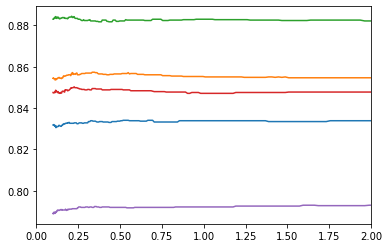

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(obj, value[0])
plt.plot(obj, value[1])
plt.plot(obj,value[2])
plt.plot(obj,value[3])
plt.plot(obj,value[4])
plt.xlim(0, 2.0)

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve

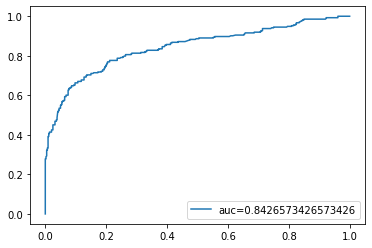

In [37]:
clf.fit(X_train, y_train1)
probas = clf.predict_proba(X_train)
fpr, tpr, _ = roc_curve(y_train1, probas[:, 1])
auc = roc_auc_score(y_train1, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)